   Total Revenue  Total Users         ARPU  Churn Rate          LTV  \
0     97399292.0        85907  1133.775967       100.0  1133.775967   

   Retention Rate  Average Order Value  Purchase Frequency  \
0             0.0          5660.774846            0.200379   

   Avg Time Between Orders  Median Customer Lifetime  Repeat Customer Rate  \
0                      NaN                       0.0                 100.0   

  Refund Rate Complaint Rate CSAT Score NPS Score  
0        None           None       None      None  


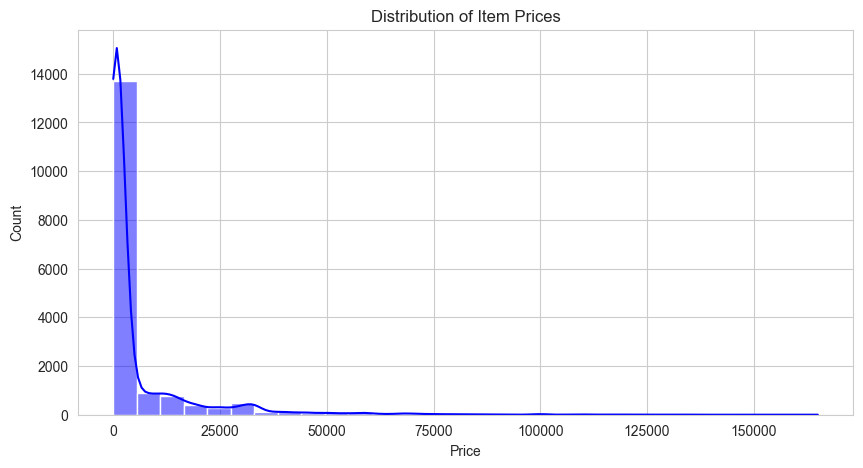

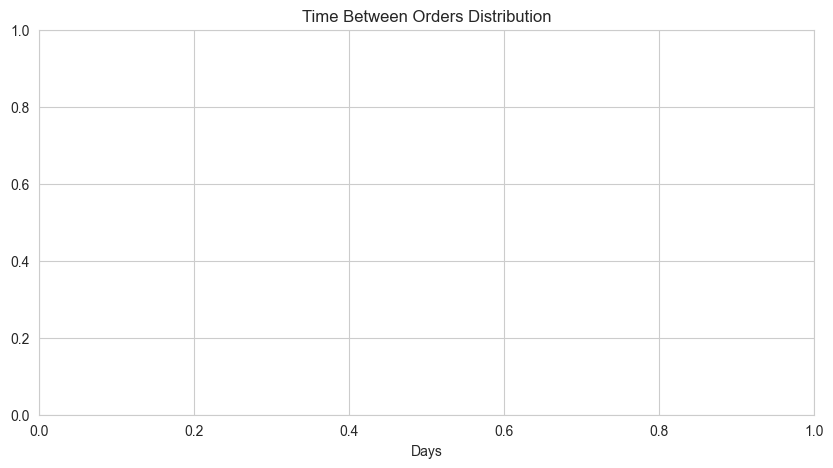

In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

file_path = "/Users/aruzhantleukul/Desktop/assignment 2/Customer_support_data.csv"
df = pd.read_csv(file_path)

#convert date columns
df["order_date_time"] = pd.to_datetime(df["order_date_time"], format="%d/%m/%Y %H:%M", errors="coerce", dayfirst=True)
df["Survey_response_Date"] = pd.to_datetime(df["Survey_response_Date"], format="%d/%m/%Y", errors="coerce")

#convert price to numeric
df.loc[:, "Item_price"] = pd.to_numeric(df["Item_price"], errors="coerce")

#sorting and calculating time difference
df = df.sort_values(by=["Unique id", "order_date_time"])
df["time_diff"] = df.groupby("Unique id")["order_date_time"].diff().dt.days

#key metrics from the lecture
total_revenue = df["Item_price"].sum()
total_users = df["Unique id"].nunique()
arpu = total_revenue / total_users

active_users = df[df["time_diff"].notna()]["Unique id"].nunique()
churn_rate = ((total_users - active_users) / total_users) * 100
ltv = arpu * (1 / (churn_rate / 100)) if churn_rate > 0 else arpu

retention_period = "2024-01-01"
retained_users = df[df["order_date_time"] >= retention_period]["Unique id"].nunique()
retention_rate = (retained_users / total_users) * 100

#additional 10-15 metrics
avg_order_value = df["Item_price"].mean()
purchase_frequency = df.groupby("Unique id")["order_date_time"].count().mean()
avg_time_between_orders = df["time_diff"].mean()
median_customer_lifetime = df.groupby("Unique id")["order_date_time"].agg(lambda x: (x.max() - x.min()).days).median()

new_customers = df.groupby("Unique id")["order_date_time"].min().gt(pd.Timestamp("2024-01-01")).sum()
repeat_customers = total_users - new_customers
repeat_customer_rate = (repeat_customers / total_users) * 100

refund_rate = df["Refund_Flag"].mean() * 100 if "Refund_Flag" in df.columns else None
complaint_rate = df["Complaint_Flag"].mean() * 100 if "Complaint_Flag" in df.columns else None

csat_score = df["CSAT_Score"].mean() if "CSAT_Score" in df.columns else None
nps_score = df["NPS_Score"].mean() if "NPS_Score" in df.columns else None

#collect metrics
metrics = {
    "Total Revenue": total_revenue,
    "Total Users": total_users,
    "ARPU": arpu,
    "Churn Rate": churn_rate,
    "LTV": ltv,
    "Retention Rate": retention_rate,
    "Average Order Value": avg_order_value,
    "Purchase Frequency": purchase_frequency,
    "Avg Time Between Orders": avg_time_between_orders,
    "Median Customer Lifetime": median_customer_lifetime,
    "Repeat Customer Rate": repeat_customer_rate,
    "Refund Rate": refund_rate,
    "Complaint Rate": complaint_rate,
    "CSAT Score": csat_score,
    "NPS Score": nps_score
}

print(pd.DataFrame(metrics, index=[0]))

#visualization
plt.figure(figsize=(10, 5))
sns.histplot(df["Item_price"], bins=30, kde=True, color="blue")
plt.title("Distribution of Item Prices")
plt.xlabel("Price")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(10, 5))
sns.boxplot(x=df["time_diff"].dropna())
plt.title("Time Between Orders Distribution")
plt.xlabel("Days")
plt.show()